In [1]:
import math
import numpy as np
import pickle
import neat
import torch
from plot_util import *
from data_load_util import *
from projections_util import *
from genetic_model import *
from Neat.evaluation_util import *

In [ ]:
combined_df = make_dataset(remove_outliers=True)
state_df = load_state_data(combined_df, load="Clean_Data/data_by_state.csv")

data_manager = DataManager(combined_df, state_df)

Loading Data
number of zip codes: 10559
number of zip codes with solar data: 10559
number of zip codes with census data: 10559
Removing Outliers
zips after removing outliers: 7795


In [3]:
#load model
with open('Neat/models/NEAT_model.pkl', 'rb') as f:
    winner = pickle.load(f)


In [4]:
#run model to get the zip order
zip_outputs = []
for i in range(0, data_manager.num_zips):
    score = winner.activate(data_manager.network_inputs(i))
    zip_outputs.append((i, score))

zip_outputs.sort(key=lambda z: z[1], reverse=True) #sort by highest score
zip_order = [index for index, score in zip_outputs]

In [ ]:
#load fitness data
with open('Neat/models/fitness_data.pkl', 'rb') as f:
    fitness_data = pickle.load(f)

df = pd.DataFrame(fitness_data, columns=["Metric", "Score"])
df.describe()

,Metric,Score
count,14991.000000,14991.000000
mean,2.539857,40620.285169
std,1.175578,29067.835805
min,1.000000,0.000000
25%,1.000000,13765.702225
50%,3.000000,36851.668329
75%,4.000000,55878.231621
max,4.000000,100000.000000


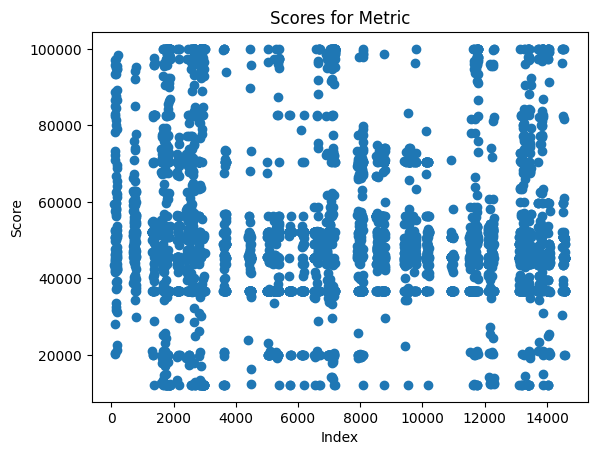

In [15]:

df_metric1 = df[df["Metric"] == 4]

# Plot the scores for Metric1
plt.scatter(df_metric1.index, df_metric1["Score"], marker='o')
plt.xlabel("Index")
plt.ylabel("Score")
plt.title("Scores for Metric")
plt.show()